In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/advertisingcsv/Advertising.csv


# What is Regression, What Does It Do?



# Regression

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.
If you don't know, today I will tell you in detail about regression, one of the most important types of data analysis, and how regression analysis works.

# What Does Regression Do?

We can say that regression analysis is used to estimate the value of the dependent variable depending on the independent variables.

### Linear Regression
Linear regression is used to model the relationship between two variables and estimate the value of a response by using a line-of-best-fit.

Regression analysis formula:

Formula Y = MX + b

Y is the dependent variable of the regression equation.
M is the slope of the regression equation.
X is the dependent variable of the regression equation.
b is the constant of the equation.

If we want to examine it on an example. Advertising data sales (in thousands of units) for a particular product advertising budgets (in thousands of dollars) for TV, radio, and newspaper media


In [2]:
df = pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv" )

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

Let's try to estimate the advertising fees spent on TV ads based on product sales.

In [4]:
X = df[["TV"]]
y = df[["Sales"]]

# Model

reg_model = LinearRegression().fit(X, y)

# constant (b - bias)
b = reg_model.intercept_[0]

# coefficient of TV (M)
M = reg_model.coef_[0][0]

print("Linear regression parameters at : b = {0}, M = {1}".format(b, M))

Linear regression parameters at : b = 7.032593549127695, M = 0.04753664043301975


## Prediction

The most common use of regression analysis is to predict future opportunities and threats.
For this example, let's estimate what the sales would be if there were 150 units of spending on TV ads.

In [5]:
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

In [6]:
# Functional:
new_data = [150]

new_data = pd.DataFrame(new_data,columns=['TV'])


reg_model.predict(new_data)

array([[14.16308961]])

## Visualization of the Model

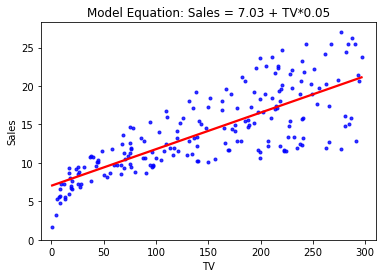

In [7]:
# Visualization of the Model
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_title(f"Model Equation: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

## Evaluating Forecast Success
### MSE
In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.
The MSE is a measure of the quality of an estimator. As it is derived from the square of Euclidean distance, it is always a positive value that decreases as the error approaches zero.



In [8]:
# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

10.512652915656757

### RMSE
The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences.
RMSD is always non-negative, and a value of 0 (almost never achieved in practice) would indicate a perfect fit to the data.

In [9]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

### MAE
mean absolute error (MAE) is the mean of the absolute differences between the actual values and the estimated values

In [10]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

### R-squared
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [11]:
# R-squared
reg_model.score(X, y)

0.611875050850071

### Multiple Linear Regression
Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.

Let's create a multiple regression model with all the variables in the Advertising dataset.

In [12]:
X = df[['TV','Radio','Newspaper']]
y = df[["Sales"]]

## Model


In [13]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=1)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# constant (b - bias)
reg_model.intercept_

# coefficients (w - weights)
reg_model.coef_


array([[0.0468431 , 0.17854434, 0.00258619]])

### Prediction
What is the expected value of the sale based on the following observation values?

TV: 30
radio: 10
newspaper: 40

In [14]:
### Prediction
new_data = [[30], [10], [40]]

new_data = pd.DataFrame(new_data).T
new_data.columns =['TV', 'Radio', 'Newspaper']

reg_model.predict(new_data)

array([[6.202131]])

## Evaluating Forecast Success


In [15]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.736902590147092

In [16]:
# TRAIN Rsquared
reg_model.score(X_train, y_train)

0.8959372632325174

In [17]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581587

In [18]:
# Test RKARE
reg_model.score(X_test, y_test)

0.8927605914615384

## CV (Cross-validation)
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.



In [19]:
# 10-Fold CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=10, scoring="neg_mean_squared_error")))

1.6913531708051797

## What to Consider in Regression Analysis?
### Outliers 
Outliers are defined as abnormal values that do not fit the normal distribution in a dataset and have the potential to significantly distort any regression model. Therefore, outliers must be handled carefully to gain accurate insights from the data. Usually, data collected from the real world consists of various observations of various characteristics, and many of the values may be misplaced. Whatever the reason for the outliers, the presence of outliers negatively affects the analysis result.

In [20]:
#Function that sets upper and lower limits for outliers.
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Function that recompiles outliers
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Are there any outliers? func prepared to answer the question. It outputs true or folse.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# To access indexes of outliers, index= true must be set
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index


Let's find outliers

In [21]:
grab_outliers(df, 'Newspaper', index=False)


     Unnamed: 0     TV  Radio  Newspaper  Sales
16           17   67.8   36.6      114.0   12.5
101         102  296.4   36.3      100.9   23.8


Let's suppress outliers.

In [22]:
replace_with_thresholds(df, 'Newspaper')

Let's check outliers again

In [23]:
grab_outliers(df, 'Newspaper', index=False)

Empty DataFrame
Columns: [Unnamed: 0, TV, Radio, Newspaper, Sales]
Index: []


### Multicollinearity
Multicollinearity occurs when two or more independent variables are highly correlated in a regression model. This means that in a regression model one independent variable can be predicted from another independent variable.

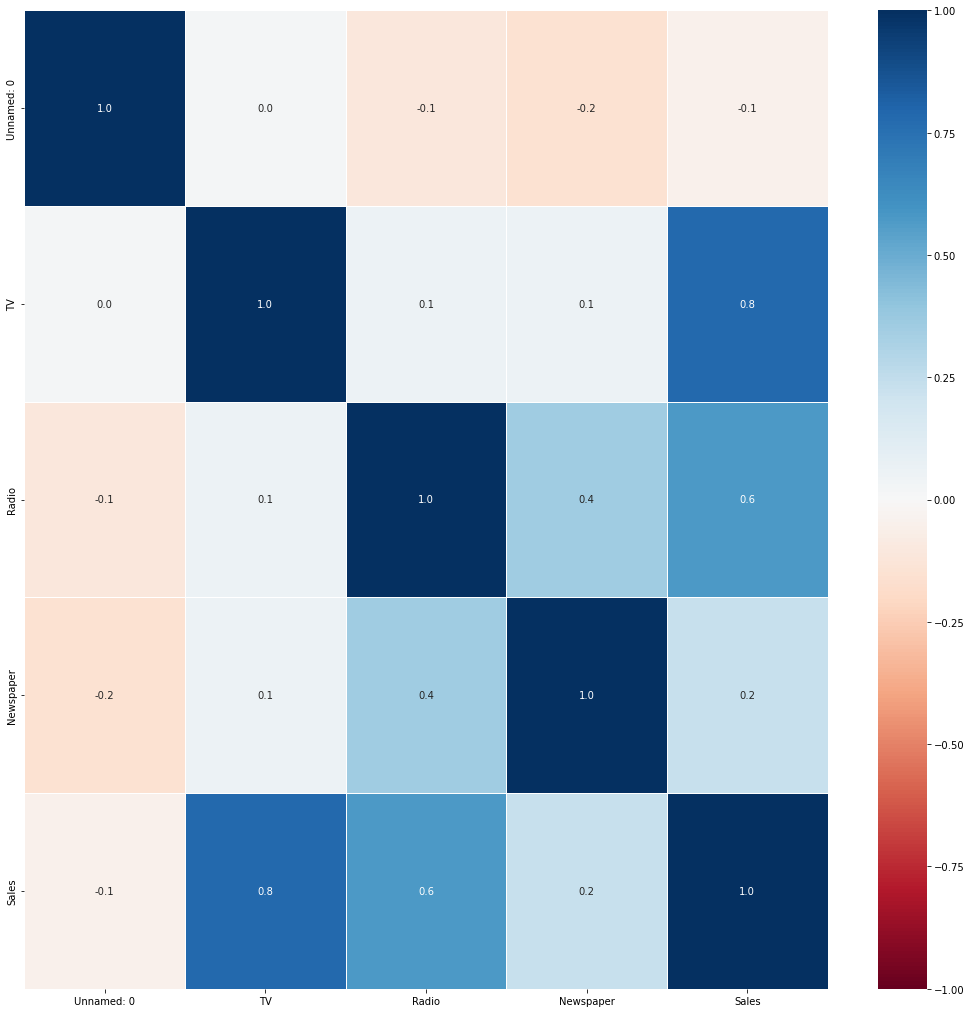

In [24]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5,cmap='RdBu', fmt= '.1f',ax=ax, vmin=-1)
plt.show()


There is no multicollinearity for this example.

### Heteroskedasticity

In statistics, heteroskedasticity (or heteroscedasticity) happens when the standard errors of a variable, monitored over a specific amount of time, are non-constant.
When observing the graph of residuals, a fan or cone shape indicates the presence of varying variance. In statistics, varying variance is seen as a problem because regressions involving ordinary least squares (OLS) assume that residuals are drawn from a population with constant variance.
Heteroskedasticity is a violation of the assumptions for linear regression modeling, and so it can impact the validity of regression

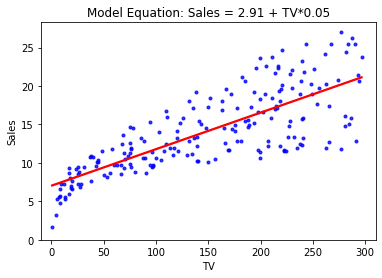

In [25]:
g = sns.regplot(x=X['TV'], y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_title(f"Model Equation: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

Heteroskedasticity for this example is seen in the figure.

### Underfit ve Overfit
When we use unnecessary explanatory variables, it can cause overfitting. Overfitting means that our algorithm works well on the training set, but does not outperform on the test sets. It is also known as the high variance problem.

Our algorithm works so badly that if it doesn't even fit a training set exactly, then it's said to be out of data. It is also known as the maladaptation problem.

## Regression Types
### Linear Regression
There are two types of linear regression analysis: simple regression and multiple linear regression


### Stepwise Linear Regression
This type of regression analysis is helpful when you're working with multiple independent variables. Three methods are used in stepwise regression.

### Polynomial Regression
It is a type of regression analysis that models the relationship of the dependent variable "x" and the independent variable "y" values nonlinearly. Although it fits a nonlinear model to the data, it is a special case of multiple linear regression.

### Logistic Regression
Logistic regression analysis to perform classification and assignment
It is a helpful regression method. Normal distribution
The assumption of continuity does not have a prerequisite.
Expected response variable according to explanatory variables.
It is a regression method whose values are obtained as probabilities.

### Ridge Regression
Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.

### Lasso Regression
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

### Quantile Regression
Quantitative regression is an econometric technique used when the necessary conditions for using linear regression are not fully met. This is an extension of linear regression analysis, i.e. it can be used when outliers are present in the data since its predictions are strong against outliers compared to linear regression.

### Elastic net regression
Elastic net regression is preferred to ridge and lasso regression when one has to deal with heavily correlated independent variables.

### Ordinal Regression
Ordinal regression is used to pre-represent the sorted values. The technique is useful when the dependent variable is ordinal. It is a special case of logistic regression.

## How to Choose the Right Regression Model for Regression Analysis?
Regression analysis mathematically describes the relationship between a set of independent variables and a dependent variable. There are many regression models you can use. This choice often depends on the type of data you have for the dependent variable and the type of model that provides the best fit.

## Differences Between Correlation and Regression
Correlation and regression are often confused with each other because correlation can often lead to regression. However, there is an important difference between them.

The difference between these two statistical measures is that correlation measures the degree of relationship between two variables (x and y), whereas regression measures how one variable affects the other.

The regression determines how x causes y to change and how the results will change if x and y are changed. With correlation, x and y are variables that can be exchanged and get the same result.
Correlation is a single statistic or data point while regression is the entire equation with all data points represented by a line.
While correlation shows the relationship between two variables, regression allows us to see how one affects the other.
Data represented by regression, when one changes, the other does not always change in the same direction, creating a cause and effect. With correlation, the variables move together.

### References
miuul,https://www.miuul.com/
Regression analysis, wikipedia, https://en.wikipedia.org/wiki/Regression_analysisi, 2023
Bulutistan,Regresyon Nedir, Ne İşe Yarar? Regresyon Analizi Nasıl Yapılır?, https://bulutistan.com/blog/regresyon/, 2023
Recep Saritekin,Yeni Baslayanlar icin Veri Bilimi Egitimi,Kaggle,https://www.kaggle.com/code/rahmetsaritekin/yeni-baslayanlar-icin-veri-bilimi-egitimi,2023
Ufuk Çolak,Makine Öğrenmesi — Model Başarı Değerlendirme Ölçütleri#3,
medium, https://ufukcolak.medium.com/makine-%C3%B6%C4%9Frenmesi-model-ba%C5%9Far%C4%B1-de%C4%9Ferlendirme-%C3%B6l%C3%A7%C3%BCtleri-3-26014630d7ce, 2013
Rebecca Bevans, Multiple Linear Regression, Scribbr, https://www.scribbr.com/statistics/multiple-linear-regression/#:~:text=What%20is%20multiple%20linear%20regression,variables%20using%20a%20straight%20line, 2023
Jim Frost, How To Interpret R-squared in Regression Analysis, https://statisticsbyjim.com/regression/interpret-r-squared-regression/
Şevket Ay, Model Performansını Değerlendirmek — Metrikler, https://medium.com/deep-learning-turkiye/model-performans%C4%B1n%C4%B1-de%C4%9Ferlendirmek-metrikler-cb6568705b1, 2023
EKOLAR.com, HETEROSCEDASTICITY, https://www.ekolar.com/degisen-varyans-heteroscedasticity/, 2023
investopedia, Heteroscedasticity Definition, https://www.investopedia.com/terms/h/heteroskedasticity.asp, 2023
Buse Köseoğlu, Model Performansını Değerlendirmek, https://medium.com/yaz%C4%B1l%C4%B1m-ve-bili%C5%9Fim-kul%C3%BCb%C3%BC/model-performans%C4%B1n%C4%B1-de%C4%9Ferlendirmek-regresyon-48b4afec8664, 2023